<a href="https://colab.research.google.com/github/kskksg4/Cat_hipsterizer/blob/master/Cat_hipsterizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cat image zip file load on Colab

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
!unzip gdrive/My\ Drive/DeepLearning/Cat_hipsterizer/cats.zip -d images

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images/__MACOSX/cats/CAT_02/._00000604_005.jpg  
  inflating: images/cats/CAT_02/00000562_011.jpg  
  inflating: images/__MACOSX/cats/CAT_02/._00000562_011.jpg  
  inflating: images/cats/CAT_02/00000596_010.jpg  
  inflating: images/__MACOSX/cats/CAT_02/._00000596_010.jpg  
  inflating: images/cats/CAT_02/00000572_011.jpg  
  inflating: images/__MACOSX/cats/CAT_02/._00000572_011.jpg  
  inflating: images/cats/CAT_02/00000536_013.jpg.cat  
  inflating: images/__MACOSX/cats/CAT_02/._00000536_013.jpg.cat  
  inflating: images/cats/CAT_02/00000648_029.jpg  
  inflating: images/__MACOSX/cats/CAT_02/._00000648_029.jpg  
  inflating: images/cats/CAT_02/00000663_020.jpg  
  inflating: images/__MACOSX/cats/CAT_02/._00000663_020.jpg  
  inflating: images/cats/CAT_02/00000697_021.jpg  
  inflating: images/__MACOSX/cats/CAT_02/._00000697_021.jpg  
  inflating: images/cats/CAT_02/00000573_016.jpg.cat  
  inflating: images/__MACOSX/cats/CAT_02/._00000

In [0]:
import random
import dlib, cv2, os
import pandas as pd
import numpy as np

In [0]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

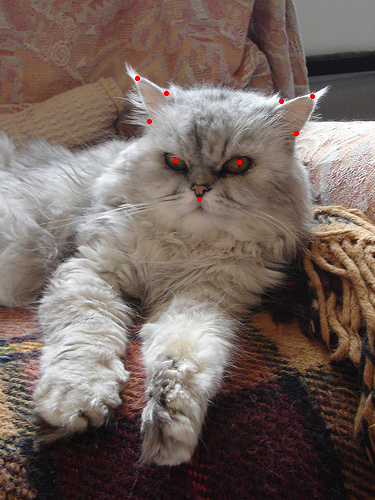

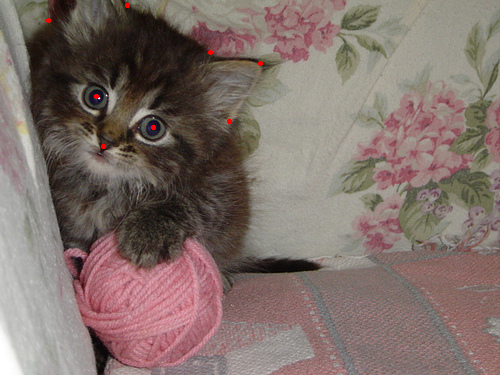

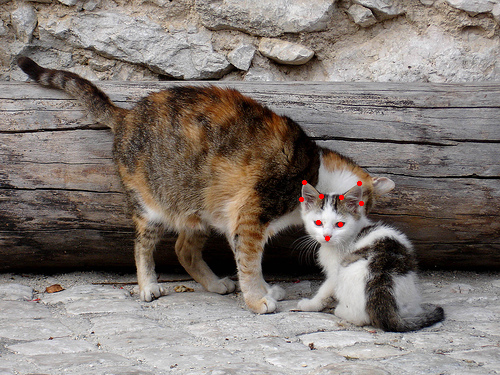

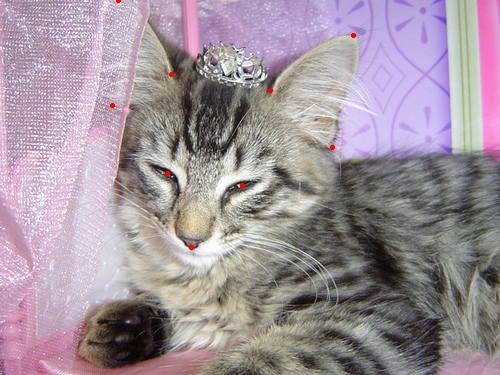

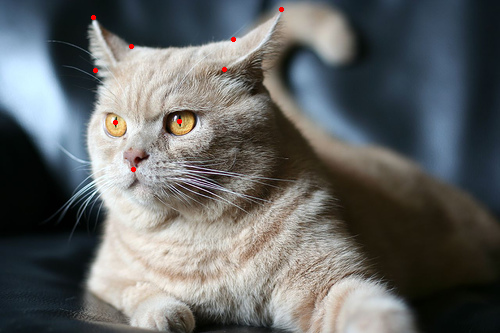

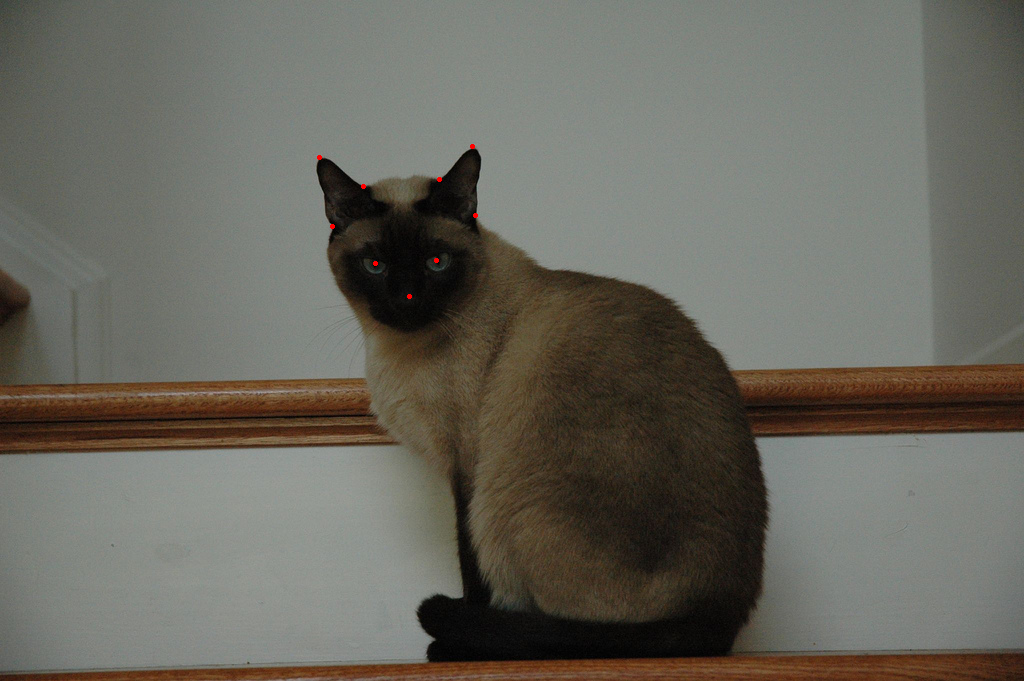

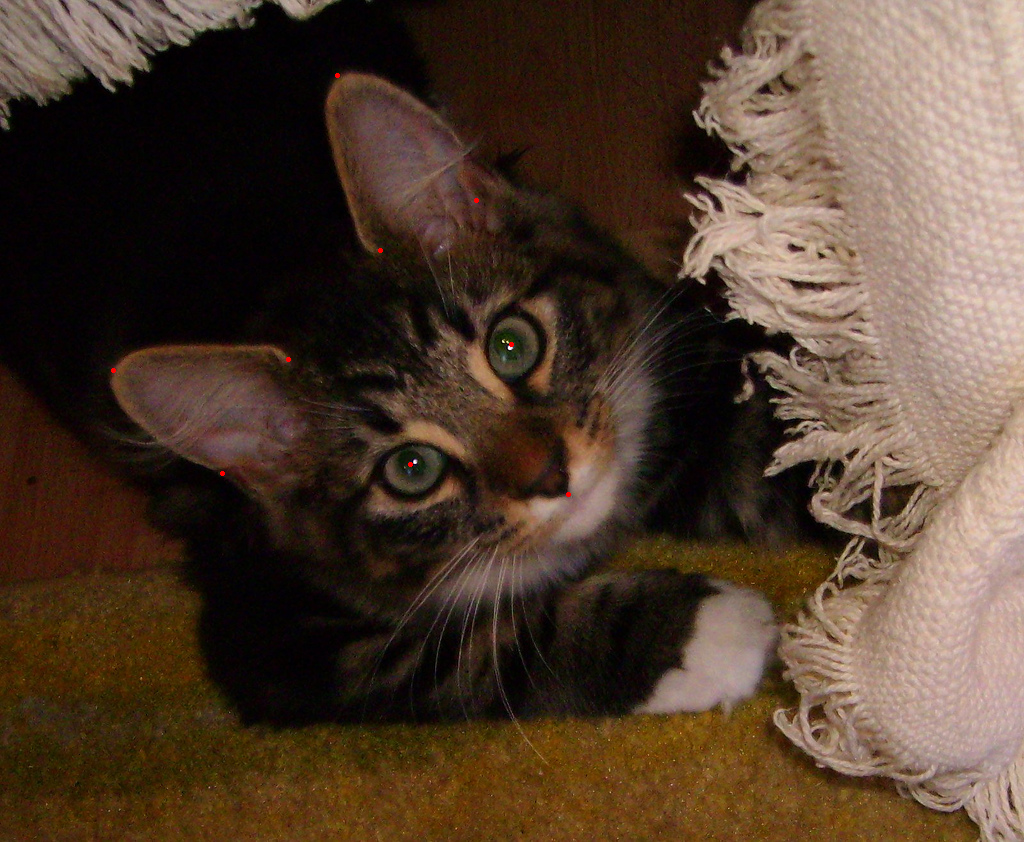

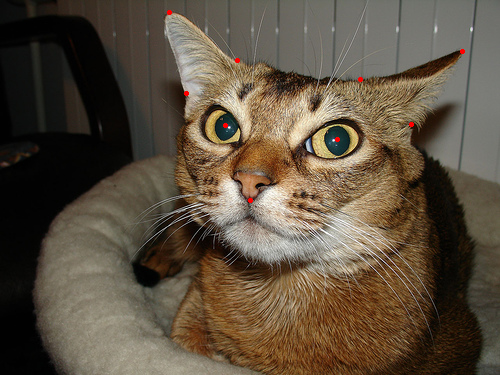

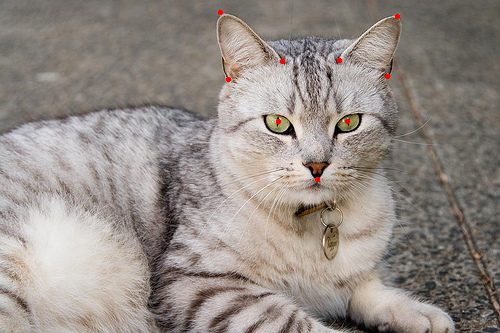

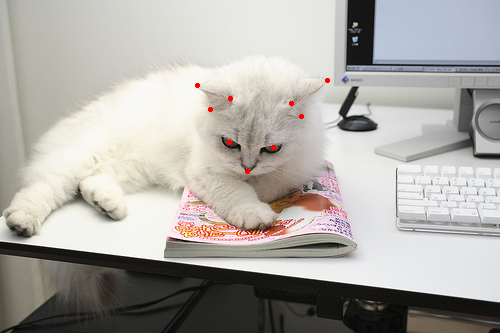

In [6]:
dirname = 'CAT_00'
base_path = 'images/cats/%s' %dirname
file_list = sorted(os.listdir(base_path))

limit = 0

for f in file_list:
  if '.cat' not in f: continue

  pd_frame = pd.read_csv(os.path.join(base_path, f), sep=' ', header=None)
  # print('pd_frame :', pd_frame)
  landmarks = (pd_frame.values[0][1:-1]).reshape((-1, 2)).astype(np.int)
  # print('pd_frame :', pd_frame.values[0][1:-1])
  # print((pd_frame.values[0][1:-1]).reshape((-1, 2)))
  # print('landmarks :\n', landmarks)

  img_filename, ext = os.path.splitext(f)
  # print(img_filename, ext)
  img = cv2.imread(os.path.join(base_path, img_filename))

  for l in landmarks:
    cv2.circle(img, center=tuple(l), radius=1, color=(0, 0, 255), thickness=2)

  cv2_imshow(img)
  limit += 1
  # if cv2.waitKey(0) == ord('q'): break
  if limit == 10: break

Image Preprocessing

In [0]:
img_size = 224
dirname = 'CAT_00'
base_path = 'images/cats/%s' %dirname
file_list = sorted(os.listdir(base_path))
random.shuffle(file_list)

In [0]:
def resize_img(im, f):
  old_size = im.shape[:2]
  # print(im.shape, 'old_size :', old_size)
  ratio = float(img_size) / max(old_size)
  # print(float(img_size), max(old_size), ratio)
  new_size = tuple([int(x * ratio) for x in old_size])
  # print('new_size :', new_size)

  im = cv2.resize(im, (new_size[1], new_size[0]))
  delta_w = img_size - new_size[1]
  delta_h = img_size - new_size[0]
  # print('w, h :', delta_w, delta_h)
  top, bottom = delta_h // 2, delta_h - (delta_h // 2)
  # print('top, bottom :', top, bottom)
  left, right = delta_w // 2, delta_w - (delta_w // 2)
  # print('left, right :', left, right)
  # print('img :', f, '\n\n')
  # 정사각형 이미지로 만든다
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

  return new_im, ratio, top, left

In [0]:
dataset = {
    'imgs' : [],
    'lmks' : [],
    'bbs' : []
}

for f in file_list:
  if '.cat' not in f: continue

  # read landmarks
  pd_frame = pd.read_csv(os.path.join(base_path, f), sep=' ', header=None)
  landmarks = (pd_frame.values[0][1:-1]).reshape((-1, 2))

  # load image
  img_filename, ext = os.path.splitext(f)
  # print(img_filename, ext, f)

  img = cv2.imread(os.path.join(base_path, img_filename))

  # resize image and relocate landmarks
  img, ratio, top, left = resize_img(img, f)
  # print('landmarks :\n', landmarks)
  landmarks = ((landmarks * ratio) + np.array([left, top])).astype(np.int)
  # print('left, top, ratio :', np.array([left, top]), ratio)
  # print('landmarks calc :\n', landmarks)
  bb = np.array([np.min(landmarks, axis=0), np.max(landmarks, axis=0)])
  # print('bb :\n', bb, '\n\n')

  dataset['imgs'].append(img)
  dataset['lmks'].append(landmarks)
  dataset['bbs'].append(bb.flatten())

In [0]:
!mkdir dataset

np.save('dataset/%s.npy' %dirname, np.array(dataset))